# Chapter 5 Exercises

In [1]:
import numpy as np
from numpy.random import choice
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pydataset import data
from sklearn.utils import resample
from numpy.random import seed

%load_ext rpy2.ipython

## Conceptual

### 2.h)
We will now investigate numerically the probability that a bootstrap sample of size $n = 100$ **contains** the $j$th observation. Here $j = 4$. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

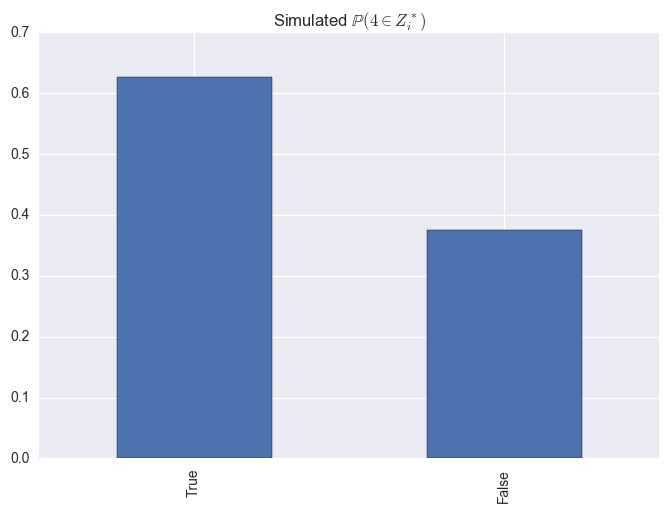

In [2]:
ntimes = 10000
store = pd.Series([4 in choice(range(1,101), size=100, replace=True) for _ in range(ntimes)])
store_freq = pd.value_counts(store, normalize=True)
store_freq.plot(kind="bar")
plt.title(r"Simulated $\mathbb{P}(4 \in Z_i^*)$")
plt.show()

In [3]:
print("P(4 in Sample [Simulation])  = {:.4f}".format(store.mean()))
print("P(4 in Sample [Theoretical]) = {:.4f}".format(1 - (1 - 1/100)**100))

P(4 in Sample [Simulation])  = 0.6256
P(4 in Sample [Theoretical]) = 0.6340


**Comment on the results obtained.**

The simulation yielded a pretty similar result as the theoretical. That is
$$
    \mathbb{P}(i \in Z_n^*) = 1 - \left(1 - \frac{1}{n}\right)^n
$$


Evidently, 
$$
    \mathbb{P}(i \in Z_n^*) \xrightarrow[n\rightarrow\infty]{} 1 - e^{-1}
$$

## Applied

### 5.
In Chapter 4, we used logistic regression to predict the probability of `default` using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [2]:
%R -o default library(ISLR); default=Default;
default.default = [1 if dflt == "Yes" else 0 for dflt in default.default]

#### 5.a)
Fit a logistic regression that uses `income` and `balance` to predict `default` *(The wrong way to do it)*

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, KFold

X = default[["income", "balance"]]
y = default.default

lrmod = LogisticRegression()
lrmod.fit(X, y)

(lrmod.predict(X) == y).mean()

0.96640000000000004

Fitting the logistic regression and computing the Overall Error Rate on the training dataset, we get 96% accuracy. This is not the way to do it.

#### 5.b)
Using the validation set approach, estimate the test error for this model.
1. Split the sample set into a training set and a validation set.
2. Fit a multiple logistic regression model using only the training observations.
3. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassiﬁed.

In [4]:
seed(1643)

### 1)
train_default, test_default = train_test_split(default, test_size=0.3)

### 2)
X = train_default[["income", "balance"]]
y = train_default.default
lrmod = LogisticRegression()
lrmod.fit(X, y)

### 3)
1 - np.mean(lrmod.predict(test_default[["income", "balance"]]) == test_default.default)

0.031000000000000028

#### 5.c)
Repeat the process in **(b)** three times, using three diﬀerent splits of the observations into a training set and a validation set. Comment on the results obtained.

In [29]:
X = default[["income", "balance"]]
y = default.default

n_folds = 3
kf = KFold(len(X), n_folds=n_folds)

mean_error = 0
for train, test in kf:
    X_train, X_test = X.iloc[train, :], X.iloc[test, :]
    y_train, y_test = y.values[train], y.values[test]
    
    lrmod_kf = LogisticRegression()
    lrmod_kf.fit(X_train, y_train)
    
    error_kf = 1 - np.mean(lrmod.predict(X_test) == y_test)
    
    mean_error += error_kf

mean_error /= n_folds; mean_error

0.033799840691927575

The overall error rate with a 3-fold C.V. was 9% bigger than with the validation set approach. Recalling the properties of the k-fold C.V., we know that this estimation is less biased than the Validation set approach.